In [8]:
import pandas as pd       
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
%matplotlib inline

pd.options.display.max_colwidth = 100

import random
import os

from numpy.random import seed
seed(42)

random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob
import cv2

from tensorflow.random import set_seed
set_seed(42)

import warnings
warnings.filterwarnings('ignore')

### Kích thước ảnh X-ray 
##### Định Dạng: JPEG
##### Kích thước: Vài trăm KB đến vài MB
##### Độ phân giải phổ biến: Độ phân giải phổ biến cho các hình ảnh X-quang ngực là từ 1024x1024 pixel đến 2048x2048 pixel.


In [2]:
# from PIL import Image
# import tkinter as tk
# from tkinter import filedialog

# def show_image_size():
#     # Mở hộp thoại để chọn file ảnh
#     file_path = filedialog.askopenfilename(title="Chọn ảnh", filetypes=[("Image files", "*.jpg;*.jpeg;*.png;*.gif")])
    
#     if file_path:
#         # Mở ảnh và lấy kích thước
#         with Image.open(file_path) as img:
#             width, height = img.size
#             size_label.config(text=f"Kích thước ảnh: {width} x {height} pixels")

# # Tạo giao diện người dùng
# root = tk.Tk()
# root.title("Hiển thị kích thước ảnh")

# size_label = tk.Label(root, text="Chưa chọn ảnh")
# size_label.pack(pady=20)

# select_button = tk.Button(root, text="Chọn ảnh", command=show_image_size)
# select_button.pack(pady=20)

# root.mainloop()

IMG_SIZE = 224: Thiết lập kích thước hình ảnh (image size) là 224x224 pixel. Đây là kích thước phổ biến được sử dụng trong các mô hình học sâu, đặc biệt là trong các mạng nơ-ron tích chập (CNN) như ResNet, VGG, và Inception. Kích thước này giúp chuẩn hóa tất cả các hình ảnh đầu vào trước khi đưa vào mô hình.

BATCH = 32: Thiết lập kích thước lô (batch size) là 32. Kích thước lô là số lượng mẫu (samples) mà mô hình sẽ xử lý trong một lần cập nhật trọng số (weight update) trong quá trình huấn luyện. Kích thước lô 32 thường được sử dụng vì nó cân bằng giữa tốc độ tính toán và hiệu quả sử dụng bộ nhớ.

SEED = 42: Thiết lập một giá trị hạt giống (seed) cho các phép toán ngẫu nhiên. Giá trị này được sử dụng để đảm bảo rằng các kết quả ngẫu nhiên có thể tái lập được. Việc sử dụng cùng một giá trị hạt giống sẽ giúp bạn có thể nhận được cùng một kết quả mỗi khi chạy lại mã, điều này rất quan trọng trong việc kiểm tra và so sánh các mô hình.

In [3]:
IMG_SIZE = 224
BATCH = 32
SEED = 42

In [9]:
main_path = "F:\\KLTN\\KL\\data3\\chest_xray"


train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")

In [10]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

In [6]:
import os
import glob

# Đường dẫn chính
main_path = r"F:\KLTN\KL\data3\chest_xray"

# Đường dẫn train và test
train_path = os.path.join(main_path, "train")
test_path = os.path.join(main_path, "test")

# Kiểm tra thư mục chính
if not os.path.exists(main_path):
    print(f"Thư mục chính không tồn tại: {main_path}")
else:
    print(f"Thư mục chính tồn tại: {main_path}")

# Kiểm tra các thư mục con
for sub_path in ["train/NORMAL", "train/PNEUMONIA", "test/NORMAL", "test/PNEUMONIA"]:
    full_path = os.path.join(main_path, sub_path.replace("/", os.sep))  # Đảm bảo sử dụng đúng dấu phân cách
    if not os.path.exists(full_path):
        print(f"Thư mục con không tồn tại: {full_path}")
    else:
        print(f"Thư mục con tồn tại: {full_path}")

# Tìm kiếm các tệp hình ảnh
train_normal = glob.glob(os.path.join(train_path, "NORMAL", "*.jpeg"))
train_pneumonia = glob.glob(os.path.join(train_path, "PNEUMONIA", "*.jpeg"))
test_normal = glob.glob(os.path.join(test_path, "NORMAL", "*.jpeg"))
test_pneumonia = glob.glob(os.path.join(test_path, "PNEUMONIA", "*.jpeg"))

# In số lượng tệp tìm thấy
print(f"Số lượng hình ảnh trong train/NORMAL: {len(train_normal)}")
print(f"Số lượng hình ảnh trong train/PNEUMONIA: {len(train_pneumonia)}")
print(f"Số lượng hình ảnh trong test/NORMAL: {len(test_normal)}")
print(f"Số lượng hình ảnh trong test/PNEUMONIA: {len(test_pneumonia)}")

# In danh sách tệp tìm thấy (nếu cần)
print("\nDanh sách tệp trong train/NORMAL:")
print(train_normal)

print("\nDanh sách tệp trong train/PNEUMONIA:")
print(train_pneumonia)

print("\nDanh sách tệp trong test/NORMAL:")
print(test_normal)

print("\nDanh sách tệp trong test/PNEUMONIA:")
print(test_pneumonia)


Thư mục chính tồn tại: F:\KLTN\KL\data3\chest_xray
Thư mục con tồn tại: F:\KLTN\KL\data3\chest_xray\train\NORMAL
Thư mục con tồn tại: F:\KLTN\KL\data3\chest_xray\train\PNEUMONIA
Thư mục con tồn tại: F:\KLTN\KL\data3\chest_xray\test\NORMAL
Thư mục con tồn tại: F:\KLTN\KL\data3\chest_xray\test\PNEUMONIA
Số lượng hình ảnh trong train/NORMAL: 1059
Số lượng hình ảnh trong train/PNEUMONIA: 3091
Số lượng hình ảnh trong test/NORMAL: 185
Số lượng hình ảnh trong test/PNEUMONIA: 307

Danh sách tệp trong train/NORMAL:
['F:\\KLTN\\KL\\data3\\chest_xray\\train\\NORMAL\\IM-0115-0001.jpeg', 'F:\\KLTN\\KL\\data3\\chest_xray\\train\\NORMAL\\IM-0117-0001.jpeg', 'F:\\KLTN\\KL\\data3\\chest_xray\\train\\NORMAL\\IM-0135-0001.jpeg', 'F:\\KLTN\\KL\\data3\\chest_xray\\train\\NORMAL\\IM-0137-0001.jpeg', 'F:\\KLTN\\KL\\data3\\chest_xray\\train\\NORMAL\\IM-0154-0001.jpeg', 'F:\\KLTN\\KL\\data3\\chest_xray\\train\\NORMAL\\IM-0156-0001.jpeg', 'F:\\KLTN\\KL\\data3\\chest_xray\\train\\NORMAL\\IM-0176-0001.jpeg', 'F:\

In [11]:
df_train

class  \
0        Normal   
1        Normal   
2        Normal   
3        Normal   
4        Normal   
...         ...   
4145  Pneumonia   
4146  Pneumonia   
4147  Pneumonia   
4148  Pneumonia   
4149  Pneumonia   

                                                                         image  
0                   F:\KLTN\KL\data3\chest_xray\train/NORMAL\IM-0115-0001.jpeg  
1                   F:\KLTN\KL\data3\chest_xray\train/NORMAL\IM-0117-0001.jpeg  
2                   F:\KLTN\KL\data3\chest_xray\train/NORMAL\IM-0135-0001.jpeg  
3                   F:\KLTN\KL\data3\chest_xray\train/NORMAL\IM-0137-0001.jpeg  
4                   F:\KLTN\KL\data3\chest_xray\train/NORMAL\IM-0154-0001.jpeg  
...                                                                        ...  
4145  F:\KLTN\KL\data3\chest_xray\train/PNEUMONIA\person998_bacteria_2928.jpeg  
4146       F:\KLTN\KL\data3\chest_xray\train/PNEUMONIA\person99_virus_183.jpeg  
4147      F:\KLTN\KL\data3\chest_xray\train/PNEUMONIA\person9_bacteria_39.jpeg  
4148      F:\KLTN\KL\data3\chest_xray\train/PNEUMONIA\person9_bacteria_40.jpeg  
4149      F:\KLTN\KL\data3\chest_xray\train/PNEUMONIA\person9_bacteria_41.jpeg  

[4150 rows x 2 columns]

In [12]:
df_test

class  \
0       Normal   
1       Normal   
2       Normal   
3       Normal   
4       Normal   
..         ...   
487  Pneumonia   
488  Pneumonia   
489  Pneumonia   
490  Pneumonia   
491  Pneumonia   

                                                                     image  
0                F:\KLTN\KL\data3\chest_xray\test/NORMAL\IM-0001-0001.jpeg  
1                F:\KLTN\KL\data3\chest_xray\test/NORMAL\IM-0003-0001.jpeg  
2                F:\KLTN\KL\data3\chest_xray\test/NORMAL\IM-0005-0001.jpeg  
3                F:\KLTN\KL\data3\chest_xray\test/NORMAL\IM-0006-0001.jpeg  
4                F:\KLTN\KL\data3\chest_xray\test/NORMAL\IM-0007-0001.jpeg  
..                                                                     ...  
487  F:\KLTN\KL\data3\chest_xray\test/PNEUMONIA\person96_bacteria_465.jpeg  
488  F:\KLTN\KL\data3\chest_xray\test/PNEUMONIA\person96_bacteria_466.jpeg  
489  F:\KLTN\KL\data3\chest_xray\test/PNEUMONIA\person97_bacteria_468.jpeg  
490  F:\KLTN\KL\data3\chest_xray\test/PNEUMONIA\person99_bacteria_473.jpeg  
491  F:\KLTN\KL\data3\chest_xray\test/PNEUMONIA\person99_bacteria_474.jpeg  

[492 rows x 2 columns]

### Trực quan hóa Dữ liệu

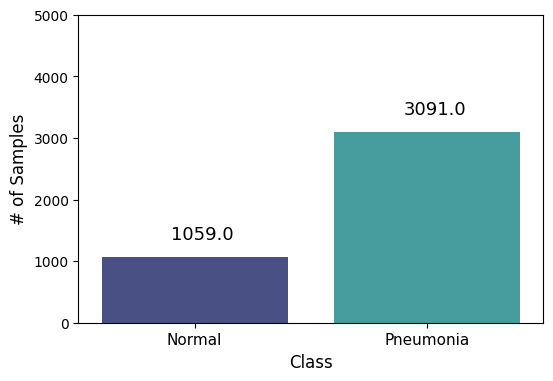

In [9]:
# Kiem tra phan phoi tren tap hop
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_train, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,5000)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)
    
plt.show()

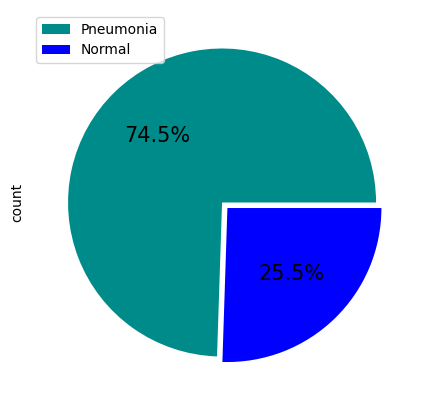

In [10]:
plt.figure(figsize=(7,5))

df_train['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

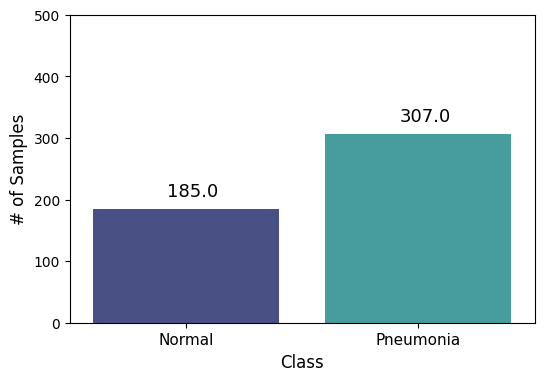

In [11]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_test, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,500)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+20), fontsize = 13)
    
plt.show()

Train Set - Normal


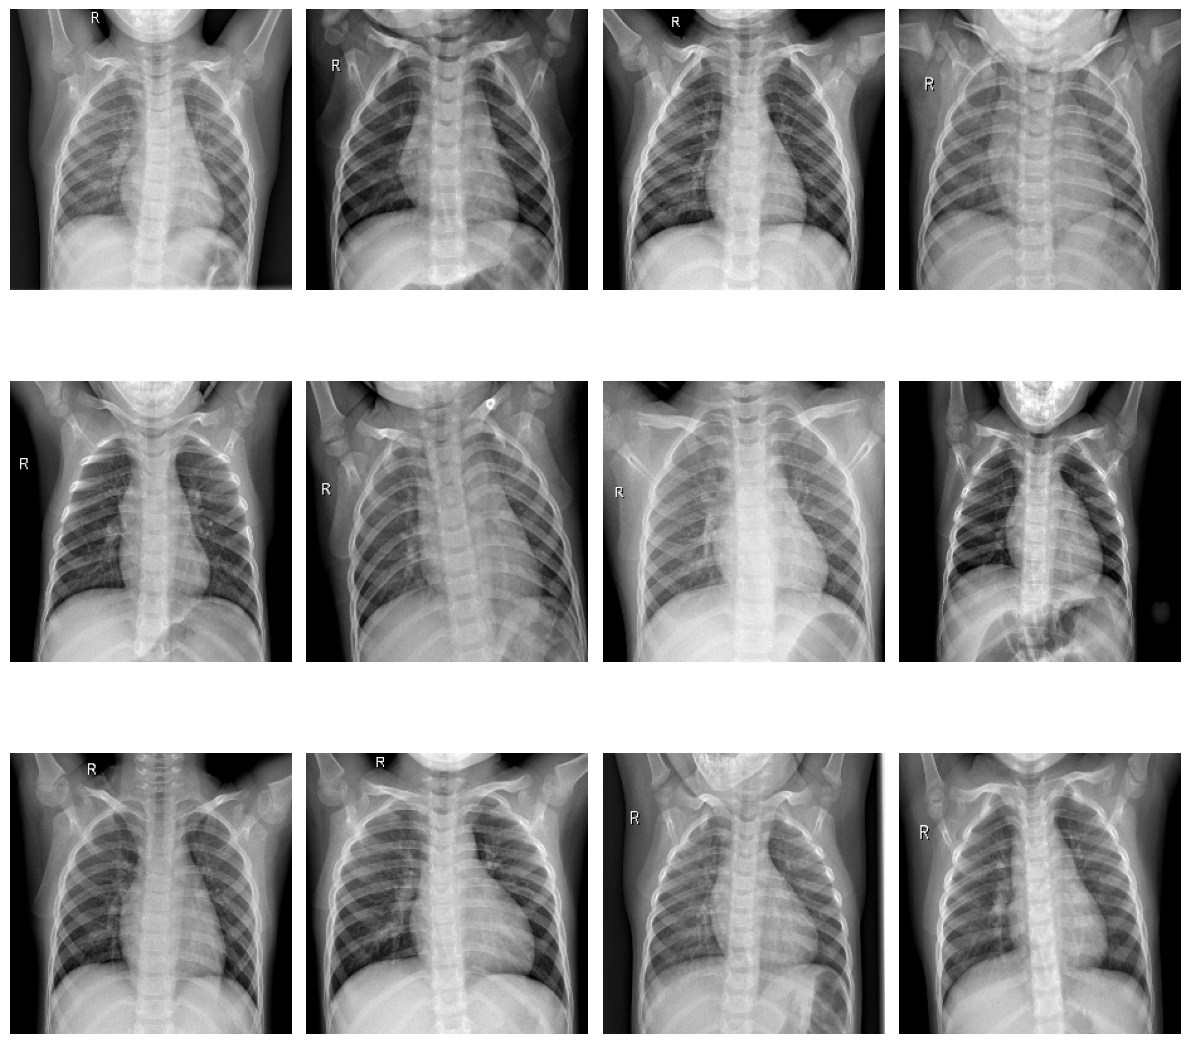

In [12]:
import cv2
import matplotlib.pyplot as plt

print('Train Set - Normal')

plt.figure(figsize=(12, 12))

for i in range(0, 12):
    plt.subplot(3, 4, i + 1)
    
    # Đọc hình ảnh
    img_path = train_normal[i]
    img = cv2.imread(img_path)
    
    # Kiểm tra xem hình ảnh có được đọc thành công không
    if img is None:
        print(f"Không thể đọc hình ảnh từ: {img_path}")
        continue  # Bỏ qua nếu không đọc được
    
    # Resize hình ảnh
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển sang RGB để hiển thị với Matplotlib
    
    # Hiển thị hình ảnh
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()
plt.show()


Train Set - Pneumonia


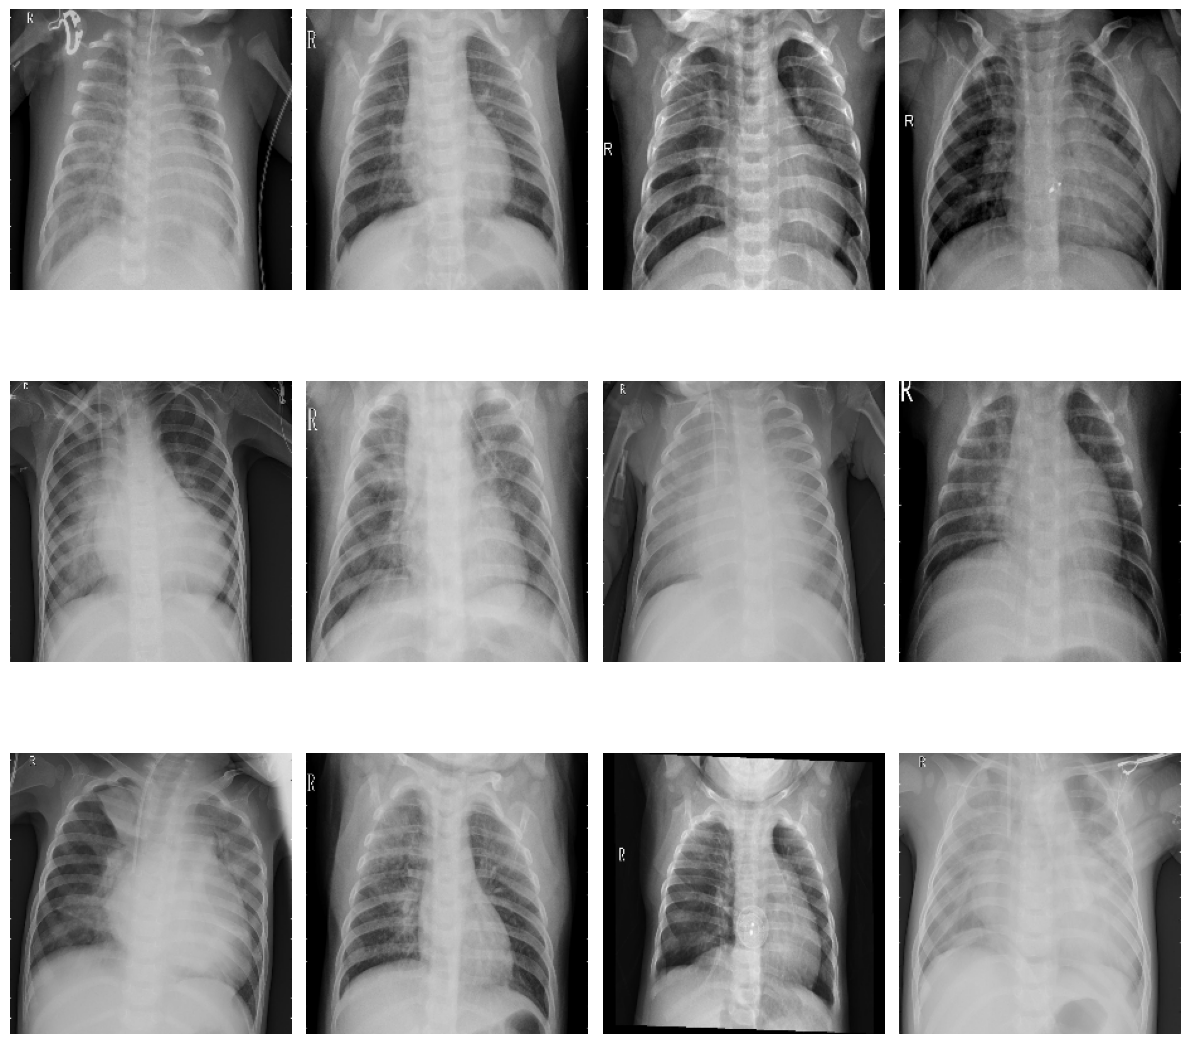

In [13]:
print('Train Set - Pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set - Normal


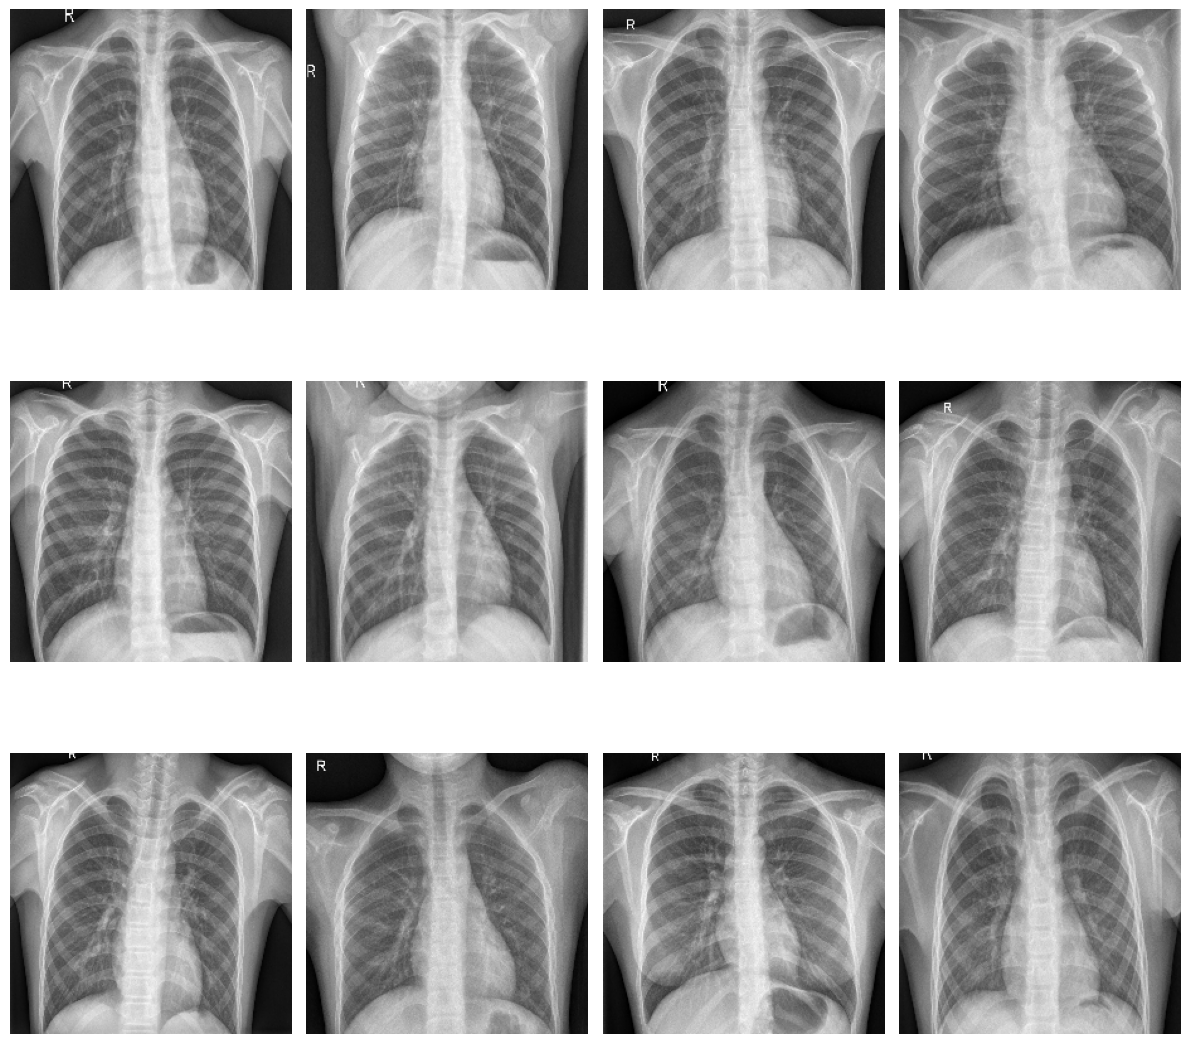

In [14]:
print('Test Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set - Pneumonia


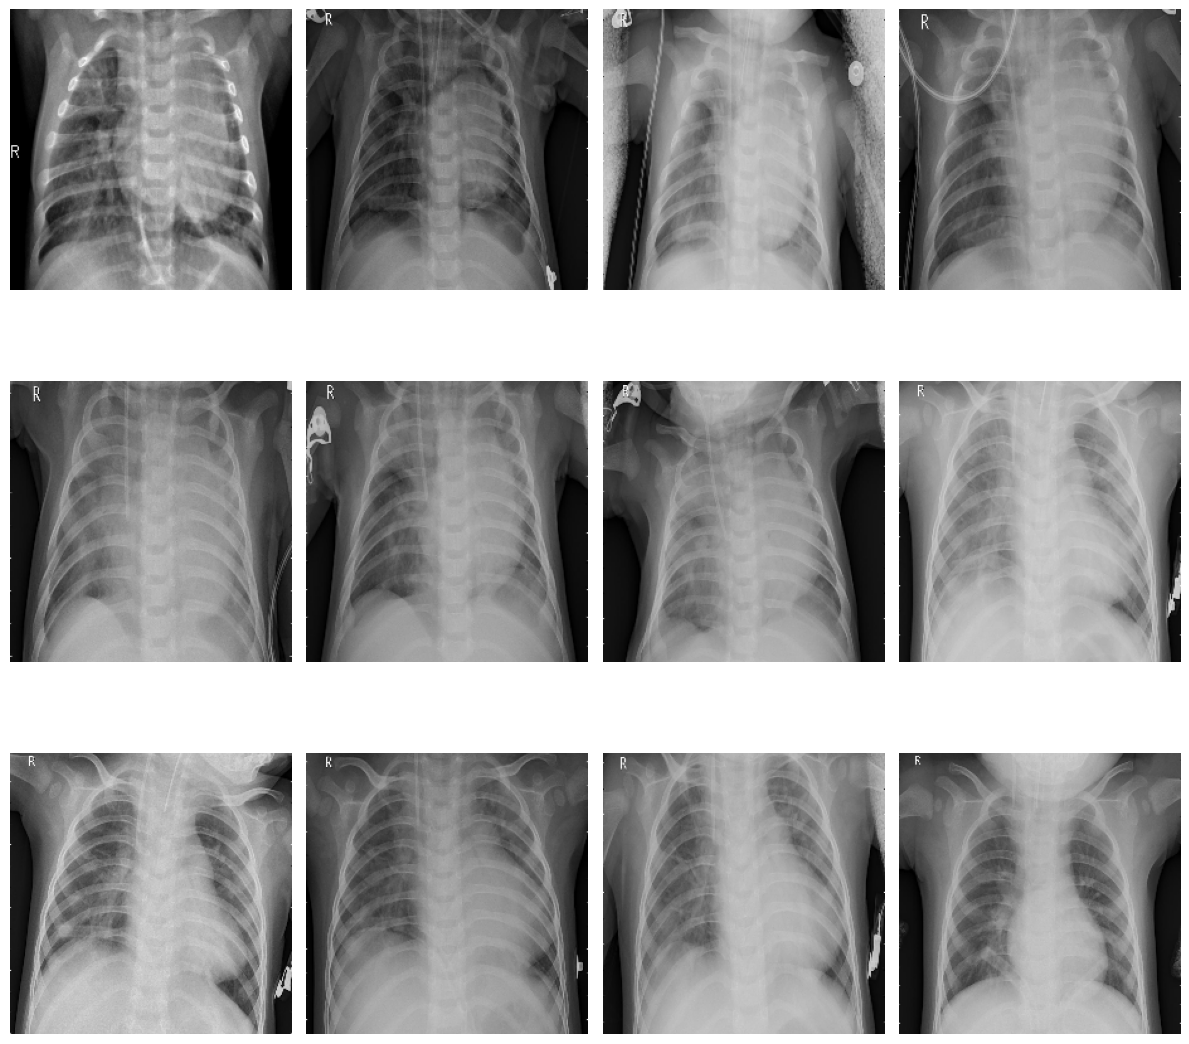

In [15]:
print('Test Set - Pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

#### Chuẩn bị dữ liệu
Đầu tiên, chúng ta cần tạo một tập xác thực. Để làm điều đó, chúng ta áp dụng một phân chia phân tầng đơn giản trên tập dữ liệu đào tạo ban đầu, sử dụng 80% cho mục đích đào tạo thực tế và 20% cho mục đích xác thực.

In [16]:
train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = SEED, stratify = df_train['class'])

In [17]:
train_df

class  \
1843  Pneumonia   
1643  Pneumonia   
1861  Pneumonia   
3848  Pneumonia   
2393  Pneumonia   
...         ...   
2507  Pneumonia   
1947  Pneumonia   
22       Normal   
922      Normal   
1636  Pneumonia   

                                                                          image  
1843  F:\KLTN\KL\data3\chest_xray\train/PNEUMONIA\person1388_bacteria_3529.jpeg  
1643  F:\KLTN\KL\data3\chest_xray\train/PNEUMONIA\person1308_bacteria_3290.jpeg  
1861  F:\KLTN\KL\data3\chest_xray\train/PNEUMONIA\person1399_bacteria_3549.jpeg  
3848      F:\KLTN\KL\data3\chest_xray\train/PNEUMONIA\person819_virus_1455.jpeg  
2393  F:\KLTN\KL\data3\chest_xray\train/PNEUMONIA\person1639_bacteria_4343.jpeg  
...                                                                         ...  
2507  F:\KLTN\KL\data3\chest_xray\train/PNEUMONIA\person1719_bacteria_4544.jpeg  
1947     F:\KLTN\KL\data3\chest_xray\train/PNEUMONIA\person1430_virus_2444.jpeg  
22                   F:\KLTN\KL\data3\chest_xray\train/NORMAL\IM-0286-0001.jpeg  
922          F:\KLTN\KL\data3\chest_xray\train/NORMAL\NORMAL2-IM-1209-0001.jpeg  
1636  F:\KLTN\KL\data3\chest_xray\train/PNEUMONIA\person1307_bacteria_3278.jpeg  

[3320 rows x 2 columns]

In [18]:
val_df

class  \
3430  Pneumonia   
1745  Pneumonia   
1770  Pneumonia   
2356  Pneumonia   
1245  Pneumonia   
...         ...   
3948  Pneumonia   
2061  Pneumonia   
2046  Pneumonia   
187      Normal   
1160  Pneumonia   

                                                                          image  
3430   F:\KLTN\KL\data3\chest_xray\train/PNEUMONIA\person553_bacteria_2317.jpeg  
1745  F:\KLTN\KL\data3\chest_xray\train/PNEUMONIA\person1343_bacteria_3415.jpeg  
1770  F:\KLTN\KL\data3\chest_xray\train/PNEUMONIA\person1349_bacteria_3438.jpeg  
2356  F:\KLTN\KL\data3\chest_xray\train/PNEUMONIA\person1616_bacteria_4251.jpeg  
1245  F:\KLTN\KL\data3\chest_xray\train/PNEUMONIA\person1107_bacteria_3048.jpeg  
...                                                                         ...  
3948   F:\KLTN\KL\data3\chest_xray\train/PNEUMONIA\person887_bacteria_2811.jpeg  
2061  F:\KLTN\KL\data3\chest_xray\train/PNEUMONIA\person1481_bacteria_3862.jpeg  
2046     F:\KLTN\KL\data3\chest_xray\train/PNEUMONIA\person1473_virus_2551.jpeg  
187                  F:\KLTN\KL\data3\chest_xray\train/NORMAL\IM-0586-0001.jpeg  
1160     F:\KLTN\KL\data3\chest_xray\train/PNEUMONIA\person1062_virus_1762.jpeg  

[830 rows x 2 columns]

Bây giờ, chúng ta sẽ tải hình ảnh từ các thư mục và chuẩn bị chúng để đưa vào mô hình.

Bắt đầu bằng cách định nghĩa các trình tạo dữ liệu. Với Keras Image Data Generator, tôi có thể thay đổi tỷ lệ các giá trị pixel và áp dụng các kỹ thuật biến đổi ngẫu nhiên để tăng dữ liệu ngay lập tức. Chúng tôi định nghĩa hai trình tạo khác nhau. val_datagen được sử dụng để chỉ thay đổi tỷ lệ các tập xác thực và kiểm tra. train_datagen bao gồm một số phép biến đổi để tăng cường tập huấn luyện.

Áp dụng các trình tạo đó trên mỗi tập dữ liệu bằng phương pháp flow_from_dataframe. Ngoài các phép biến đổi được xác định trong mỗi trình tạo, các hình ảnh cũng được thay đổi kích thước dựa trên tập target_size.

In [19]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  zoom_range = 0.1,
                                  #rotation_range = 0.1,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1)

val_datagen = ImageDataGenerator(rescale=1/255.)

ds_train = train_datagen.flow_from_dataframe(train_df,
                                             #directory=train_path, #dataframe contains the full paths
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'binary',
                                             batch_size = BATCH,
                                             seed = SEED)

ds_val = val_datagen.flow_from_dataframe(val_df,
                                            #directory=train_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = BATCH,
                                            seed = SEED)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                            #directory=test_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = 1,
                                            shuffle = False)

Found 3320 validated image filenames belonging to 2 classes.
Found 830 validated image filenames belonging to 2 classes.
Found 492 validated image filenames belonging to 2 classes.


#### Tinh chỉnh model


In [20]:
#Setting callbakcs

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,                                     
    patience = 2,                                   
    min_delt = 1e-7,                                
    cooldown = 0,                               
    verbose = 1
) 

In [21]:
def get_model():
    
    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    # Block One
    x = layers.Conv2D(filters=16, kernel_size=3, padding='valid')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block Two
    x = layers.Conv2D(filters=32, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)
    
    # Block Three
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.4)(x)

    # Head
    #x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

In [22]:
keras.backend.clear_session()

model = get_model()
model.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=3e-5), metrics='binary_accuracy')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 16)      64        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 222, 222, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0     

In [23]:
history = model.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/50
103/103 [==============================] - 169s 2s/step - loss: 0.4941 - binary_accuracy: 0.7807 - val_loss: 0.7622 - val_binary_accuracy: 0.7446 - lr: 3.0000e-05
Epoch 2/50
103/103 [==============================] - 131s 1s/step - loss: 0.3175 - binary_accuracy: 0.8578 - val_loss: 1.3861 - val_binary_accuracy: 0.7446 - lr: 3.0000e-05
Epoch 3/50
104/103 [==============================] - ETA: 0s - loss: 0.2622 - binary_accuracy: 0.8864
Epoch 3: ReduceLROnPlateau reducing learning rate to 5.9999998484272515e-06.
103/103 [==============================] - 129s 1s/step - loss: 0.2622 - binary_accuracy: 0.8864 - val_loss: 1.8407 - val_binary_accuracy: 0.7446 - lr: 3.0000e-05
Epoch 4/50
103/103 [==============================] - 129s 1s/step - loss: 0.2370 - binary_accuracy: 0.9015 - val_loss: 1.6923 - val_binary_accuracy: 0.7446 - lr: 6.0000e-06
Epoch 5/50
104/103 [==============================] - ETA: 0s - loss: 0.2248 - binary_accuracy: 0.9075
Epoch 5: ReduceLROnPlateau reduc

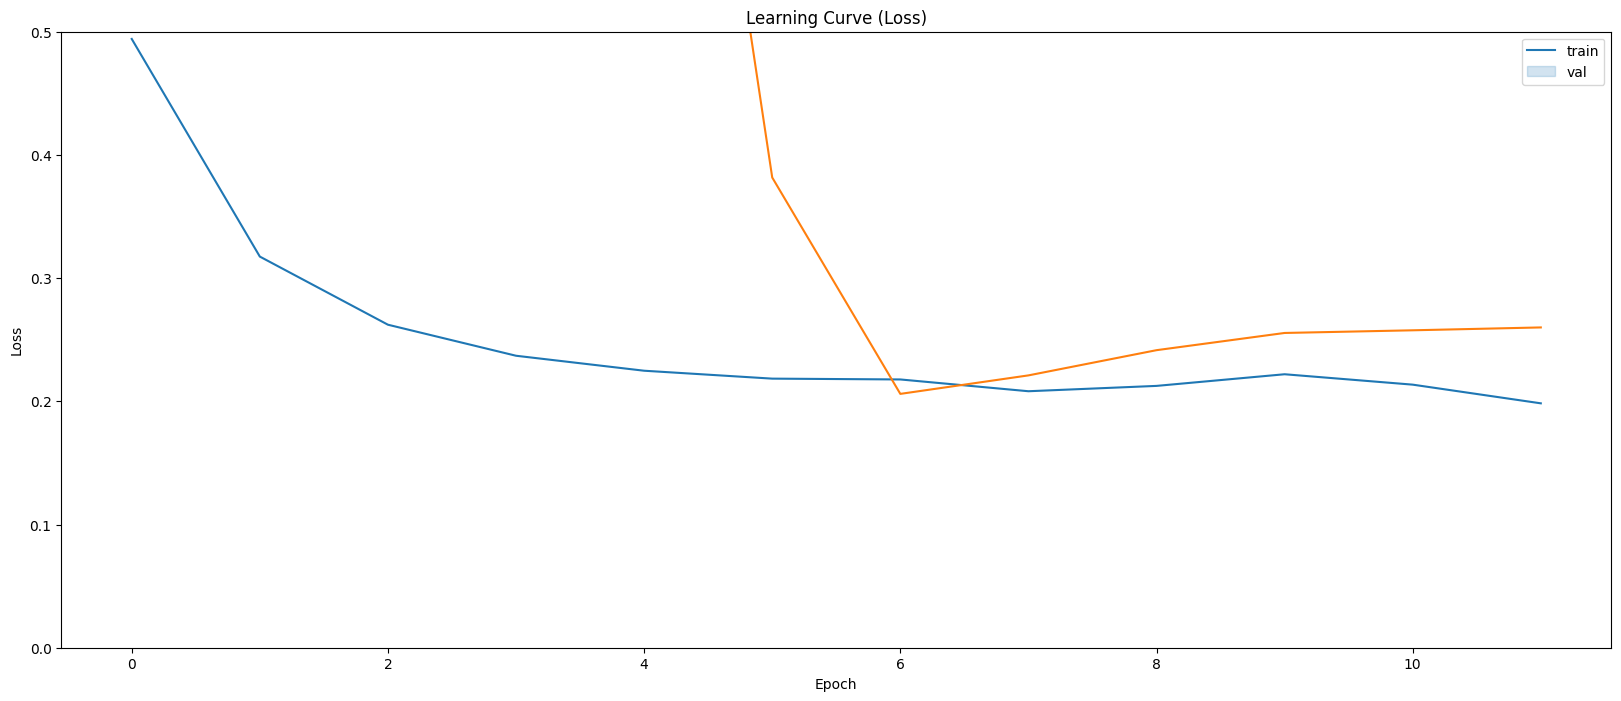

In [24]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

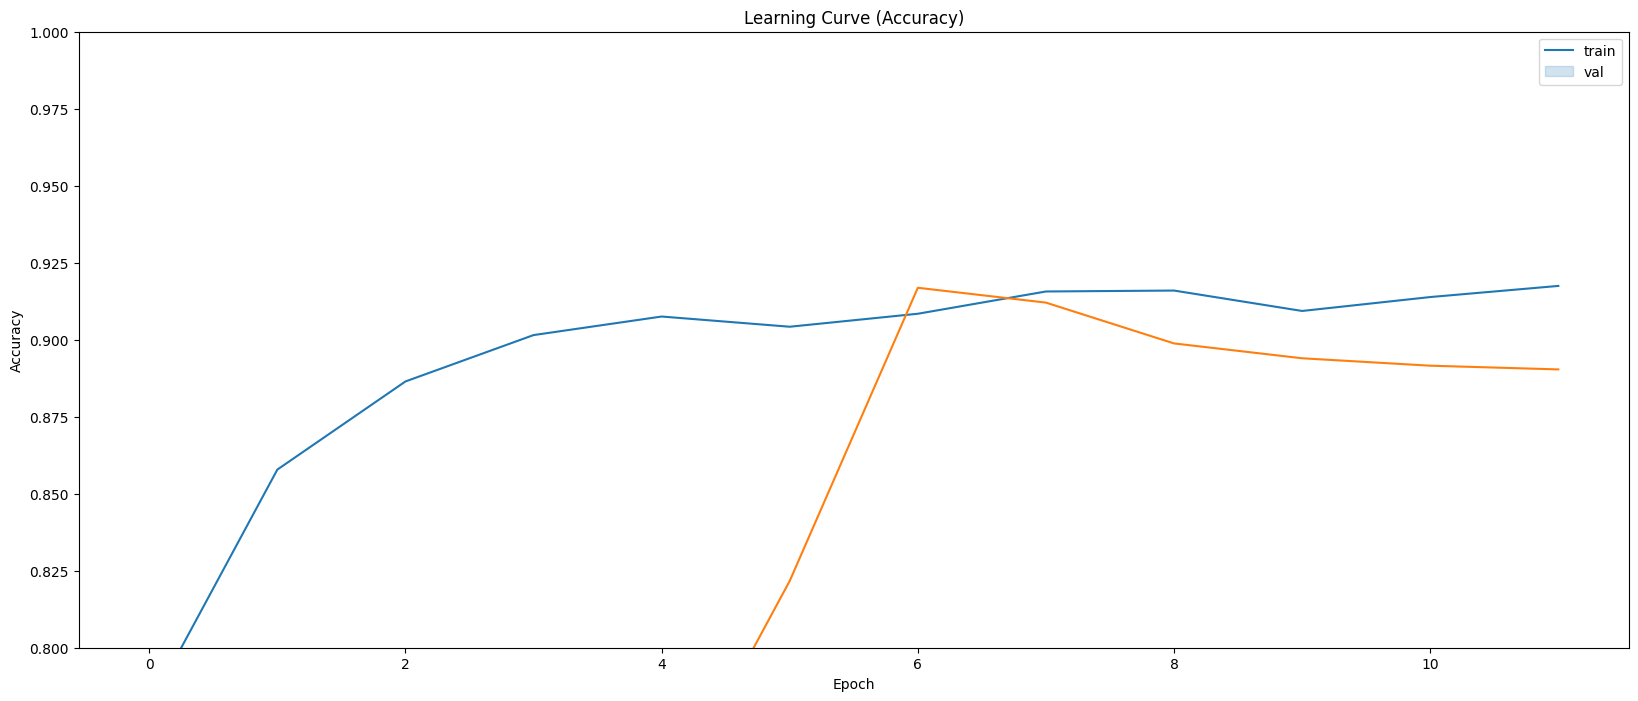

In [25]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [26]:
score = model.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.20603995025157928
Val accuracy: 0.9168674945831299


In [27]:
score = model.evaluate(ds_test, steps = len(df_test), verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5878976583480835
Test accuracy: 0.7662601470947266


In [28]:
model.save('tram1.h5')  # Lưu mô hình vào file my_model.h5

In [29]:
from keras.models import load_model

model = load_model('tram1.h5')  # Tải mô hình từ file my_model.h5

In [35]:
from keras.preprocessing import image
import numpy as np

# Đường dẫn đến hình ảnh bạn muốn kiểm tra
#img_path = 'F:\\KLTN\\KL\\person100_bacteria_478.jpeg'
img_path ='F:\\KLTN\\KL\\COVID19(463).jpg'
# Tải và chuẩn bị hình ảnh
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))  # Thay IMG_SIZE bằng kích thước đầu vào của mô hình
img_array = image.img_to_array(img)  # Chuyển đổi hình ảnh thành mảng numpy
img_array = np.expand_dims(img_array, axis=0)  # Thêm một chiều để tạo thành batch

# Tiền xử lý (nếu cần thiết)
img_array /= 255.0  # Nếu bạn đã chuẩn hóa dữ liệu trong quá trình huấn luyện

In [37]:
# Assuming predictions is the output from model.predict(img_array)
predictions = model.predict(img_array)
predicted_probability = predictions[0][0]  # Get the probability for the positive class
predicted_percentage = predicted_probability * 100  # Convert to percentage

print('Predicted probability:', predicted_probability)
print('Predicted percentage: {:.2f}%'.format(predicted_percentage))

1/1 [==============================] - 0s 29ms/step
Predicted probability: 0.28096938
Predicted percentage: 28.10%


##### Học chuyển giao

In [38]:
base_model = tf.keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model.trainable = False

def get_pretrained():
    
    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    x = base_model(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    
    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

In [39]:
keras.backend.clear_session()

model_pretrained = get_pretrained()
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=5e-5), metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [40]:
history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/50
103/103 [==============================] - 478s 5s/step - loss: 0.4419 - binary_accuracy: 0.7979 - val_loss: 0.2566 - val_binary_accuracy: 0.9253 - lr: 5.0000e-05
Epoch 2/50
103/103 [==============================] - 419s 4s/step - loss: 0.2266 - binary_accuracy: 0.9142 - val_loss: 0.2038 - val_binary_accuracy: 0.9289 - lr: 5.0000e-05
Epoch 3/50
103/103 [==============================] - 422s 4s/step - loss: 0.1796 - binary_accuracy: 0.9346 - val_loss: 0.1705 - val_binary_accuracy: 0.9398 - lr: 5.0000e-05
Epoch 4/50
103/103 [==============================] - 427s 4s/step - loss: 0.1471 - binary_accuracy: 0.9473 - val_loss: 0.1630 - val_binary_accuracy: 0.9470 - lr: 5.0000e-05
Epoch 5/50
103/103 [==============================] - 434s 4s/step - loss: 0.1414 - binary_accuracy: 0.9497 - val_loss: 0.1535 - val_binary_accuracy: 0.9494 - lr: 5.0000e-05
Epoch 6/50
103/103 [==============================] - 425s 4s/step - loss: 0.1373 - binary_accuracy: 0.9500 - val_loss: 0.1491 - v

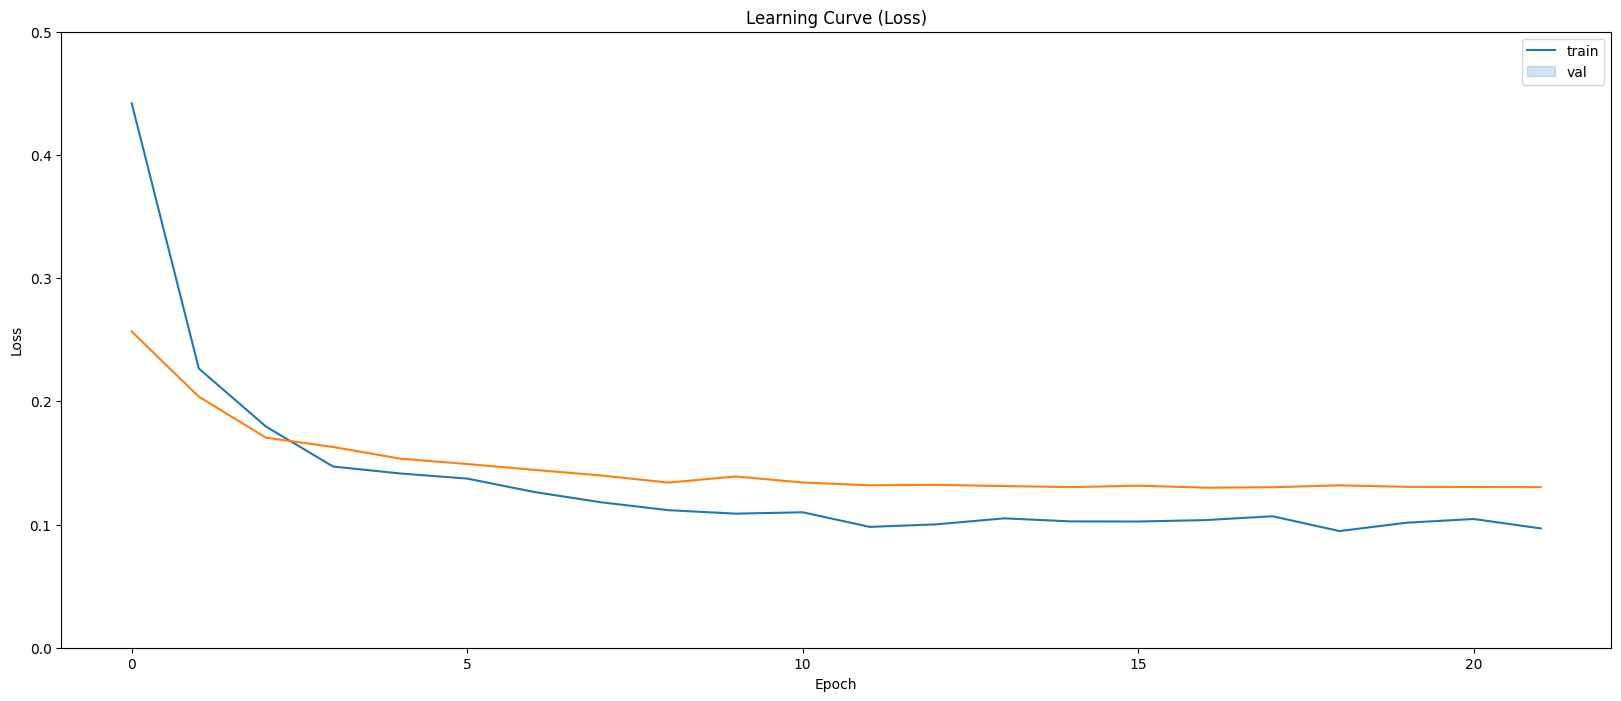

In [41]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

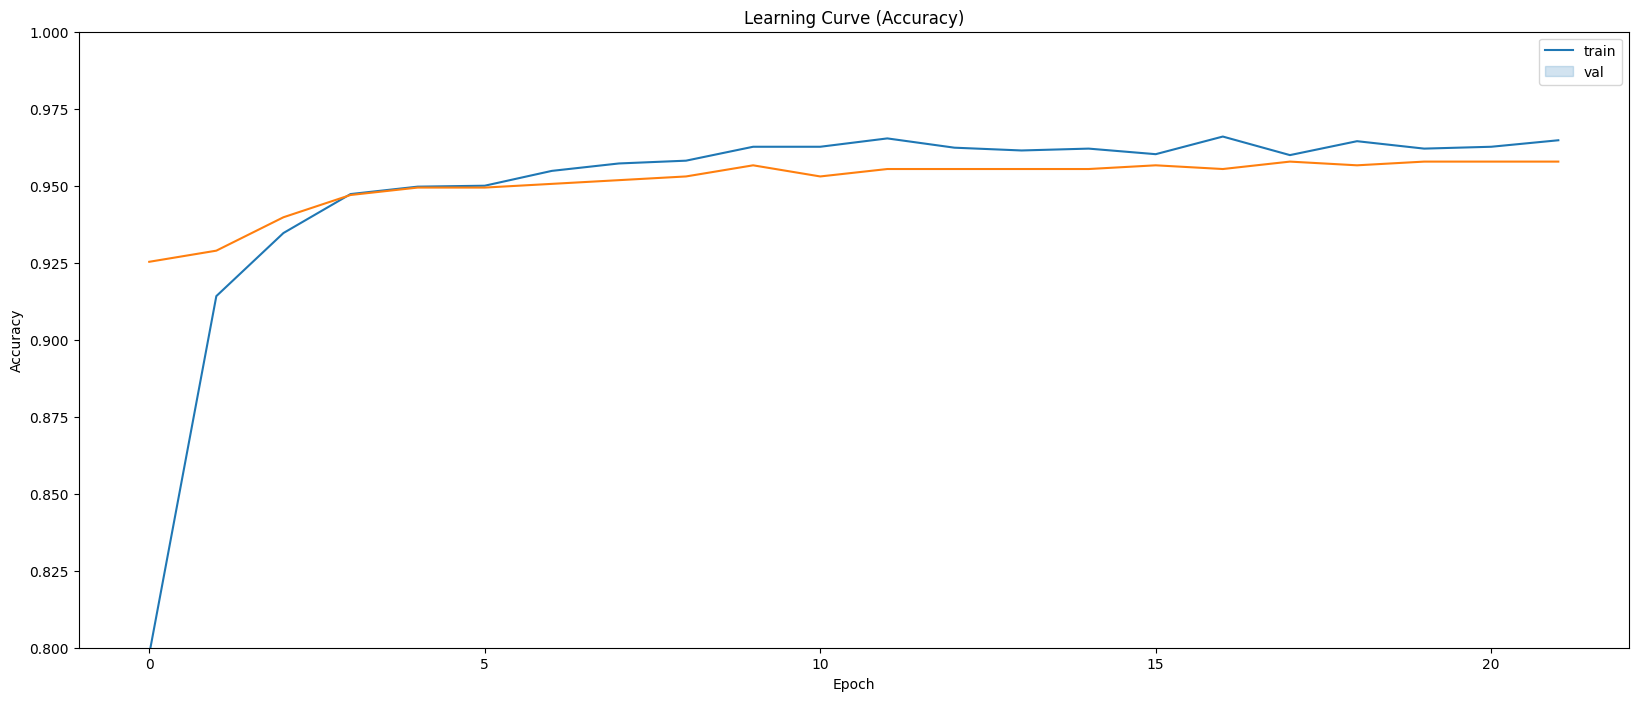

In [42]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [43]:
score = model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.12991638481616974
Val accuracy: 0.9554216861724854


In [44]:
score = model_pretrained.evaluate(ds_test, steps = len(df_test), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5068206787109375
Test accuracy: 0.8211382031440735


In [45]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-13]:
    layer.trainable = False

In [46]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 conv1_pad False
2 conv1_conv False
3 pool1_pad False
4 pool1_pool False
5 conv2_block1_preact_bn False
6 conv2_block1_preact_relu False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_pad False
11 conv2_block1_2_conv False
12 conv2_block1_2_bn False
13 conv2_block1_2_relu False
14 conv2_block1_0_conv False
15 conv2_block1_3_conv False
16 conv2_block1_out False
17 conv2_block2_preact_bn False
18 conv2_block2_preact_relu False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_pad False
23 conv2_block2_2_conv False
24 conv2_block2_2_bn False
25 conv2_block2_2_relu False
26 conv2_block2_3_conv False
27 conv2_block2_out False
28 conv2_block3_preact_bn False
29 conv2_block3_preact_relu False
30 conv2_block3_1_conv False
31 conv2_block3_1_bn False
32 conv2_block3_1_relu False
33 conv2_block3_2_pad False
34 conv2_block3_2_conv False
35 conv2_block3_2_bn False
36 conv2_bloc

In [47]:
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=2e-6), metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [48]:
history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/50
103/103 [==============================] - 455s 4s/step - loss: 0.1994 - binary_accuracy: 0.9187 - val_loss: 0.1711 - val_binary_accuracy: 0.9361 - lr: 2.0000e-06
Epoch 2/50
103/103 [==============================] - 442s 4s/step - loss: 0.1647 - binary_accuracy: 0.9473 - val_loss: 0.1769 - val_binary_accuracy: 0.9373 - lr: 2.0000e-06
Epoch 3/50
103/103 [==============================] - 446s 4s/step - loss: 0.1559 - binary_accuracy: 0.9482 - val_loss: 0.1692 - val_binary_accuracy: 0.9373 - lr: 2.0000e-06
Epoch 4/50
103/103 [==============================] - 447s 4s/step - loss: 0.1440 - binary_accuracy: 0.9533 - val_loss: 0.1616 - val_binary_accuracy: 0.9398 - lr: 2.0000e-06
Epoch 5/50
103/103 [==============================] - 443s 4s/step - loss: 0.1316 - binary_accuracy: 0.9593 - val_loss: 0.1571 - val_binary_accuracy: 0.9434 - lr: 2.0000e-06
Epoch 6/50
103/103 [==============================] - 445s 4s/step - loss: 0.1322 - binary_accuracy: 0.9533 - val_loss: 0.1515 - v

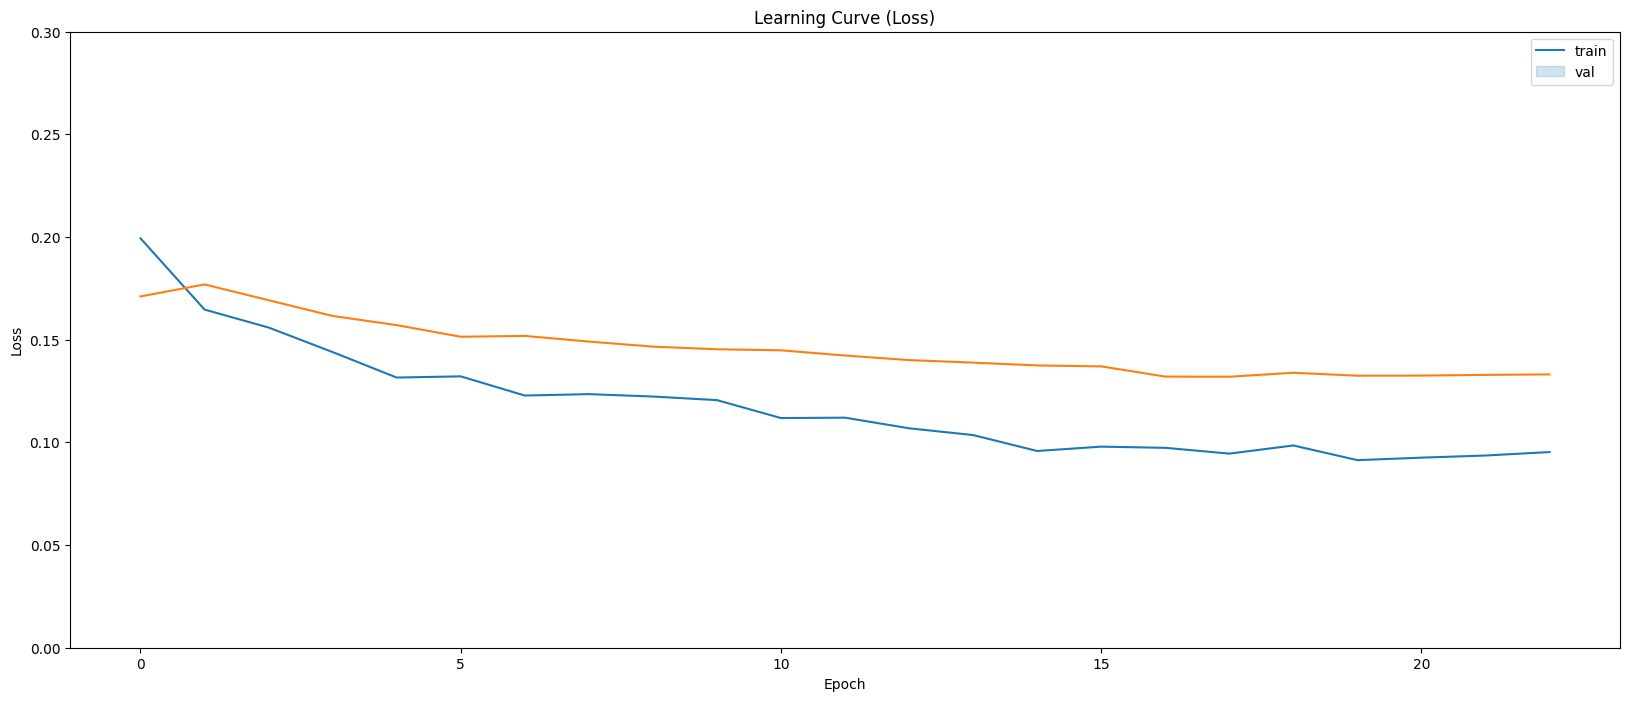

In [49]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.3)
ax.legend(['train', 'val'], loc='best')
plt.show()

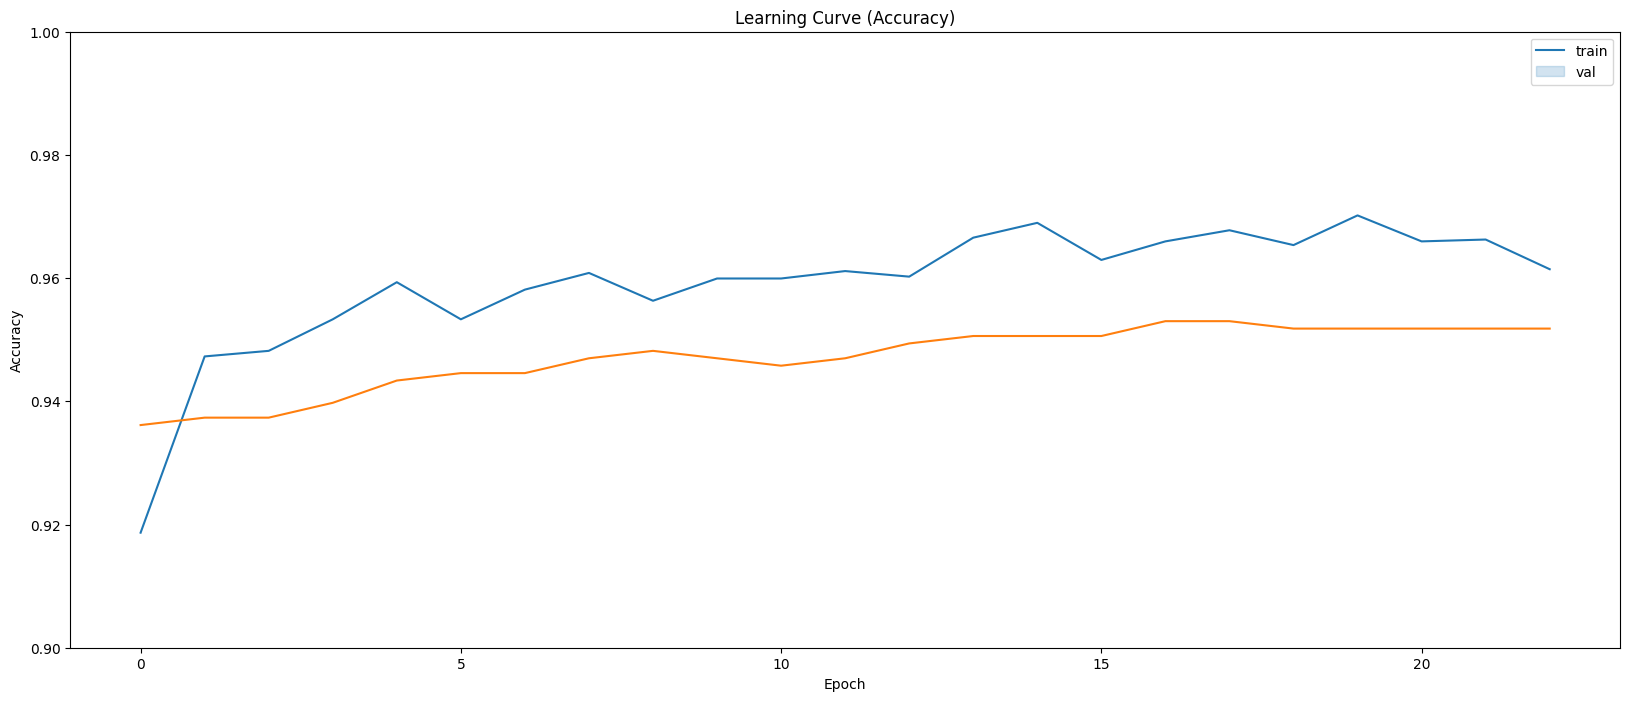

In [50]:

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.90, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [51]:
score = model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.1319657862186432
Val accuracy: 0.9530120491981506


In [52]:
score = model_pretrained.evaluate(ds_test, steps = len(df_test), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3971925377845764
Test accuracy: 0.8536585569381714


In [53]:
# Lưu mô hình đã huấn luyện
model_pretrained.save('tram1_resnet_model.h5')
print("Mô hình đã được lưu thành công!")

Mô hình đã được lưu thành công!


In [2]:
# Tải mô hình đã lưu
from tensorflow.keras.models import load_model

loaded_model = load_model('tram1_resnet_model.h5')
print("Mô hình đã được tải thành công!")


Mô hình đã được tải thành công!


In [3]:
from tensorflow.keras.utils import img_to_array, load_img
import numpy as np

# Tải một hình ảnh (đường dẫn 'img_path') và thay đổi kích thước
IMG_SIZE = 224  # Kích thước hình ảnh đã định nghĩa trước
# img_path = 'F:\\KLTN\\KL\\COVID19(463).jpg'  # Đường dẫn đến hình ảnh cần kiểm tra
img_path = 'F:\\KLTN\\KL\\person100_bacteria_478.jpeg'

image = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))  # Sử dụng img_path thay vì image_path
image_array = img_to_array(image)  # Chuyển thành mảng numpy
image_array = np.expand_dims(image_array, axis=0)  # Thêm batch dimension
image_array = image_array / 255.0  # Chuẩn hóa giá trị pixel về [0, 1]


In [4]:
# Dự đoán nhãn của hình ảnh
prediction = loaded_model.predict(image_array)

# Chuyển đổi xác suất thành nhãn nhị phân
predicted_label = 1 if prediction > 0.5 else 0

# Xác định nhãn dự đoán
if predicted_label == 1:
    diagnosis = "Có bệnh viêm phổi"
else:
    diagnosis = "Không có bệnh viêm phổi"

print(f"Xác suất dự đoán: {prediction[0][0]:.4f}")  # In xác suất với 4 chữ số thập phân
print(f"Nhãn dự đoán: {diagnosis}")


1/1 [==============================] - 2s 2s/step
Xác suất dự đoán: 0.9992
Nhãn dự đoán: Có bệnh viêm phổi


In [13]:
num_label = {'Normal': 0, 'Pneumonia' : 1}
Y_test = df_test['class'].copy().map(num_label).astype('int')

In [16]:
ds_test.reset()
predictions = model_pretrained.predict(ds_test, steps=len(ds_test), verbose=0)
pred_labels= np.where(predictions>0.5, 1, 0)

NameError: name 'ds_test' is not defined

In [ ]:
print("Test Accuracy: ", accuracy_score(Y_test, pred_labels))

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, pred_labels)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [ ]:
print(metrics.classification_report(Y_test, pred_labels, labels = [0, 1]))

In [ ]:
roc_auc = metrics.roc_auc_score(Y_test, predictions)
print('ROC_AUC: ', roc_auc)

fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)

plt.plot(fpr, tpr, label = 'ROC_AUC = %0.3f' % roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()